In [72]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

In [95]:
# import data from csv file 
# time is imported separately as a string
data = np.genfromtxt('omni.csv', delimiter=',', skip_header=117, usecols=range(1, 5))
time = np.genfromtxt('omni.csv', delimiter=',', skip_header=117, usecols=0, dtype=str)

# Convert time to datetime
time = [dt.datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%fZ') for t in time]

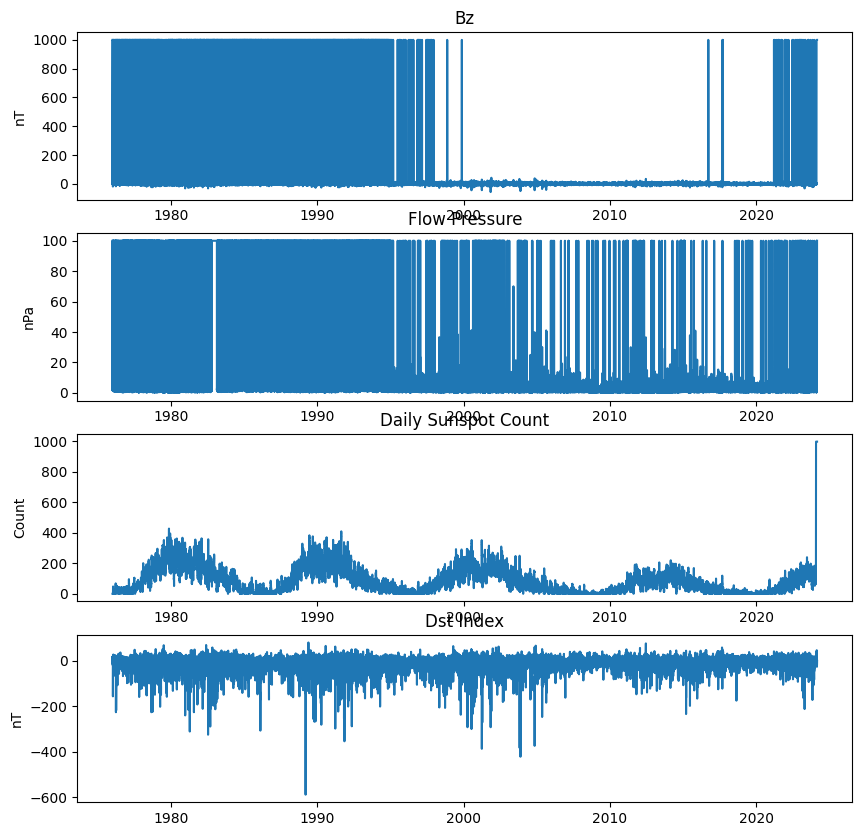

In [97]:
# plot 4 subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

axs[0].plot(time, data[:, 0])
axs[0].set_title('Bz')
axs[0].set_ylabel('nT')

axs[1].plot(time, data[:, 1])
axs[1].set_title('Flow Pressure')
axs[1].set_ylabel('nPa')

axs[2].plot(time, data[:, 2])
axs[2].set_title('Daily Sunspot Count')
axs[2].set_ylabel('Count')

axs[3].plot(time, data[:, 3])
axs[3].set_title('Dst Index')
axs[3].set_ylabel('nT')

plt.show()